In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler, SMOTE
import graphviz
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.utils import class_weight

In [ ]:
# Run this cell if working in Google CoLab
!pip uninstall scikit-learn -y
!pip uninstall imbalanced-learn -y

!pip install -U scikit-learn imbalanced-learn

Found existing installation: scikit-learn 1.0.1
Uninstalling scikit-learn-1.0.1:
  Successfully uninstalled scikit-learn-1.0.1
Found existing installation: imbalanced-learn 0.8.1
Uninstalling imbalanced-learn-0.8.1:
  Successfully uninstalled imbalanced-learn-0.8.1
     |████████████████████████████████| 23.2 MB 75.6 MB/s 
     |████████████████████████████████| 189 kB 57.6 MB/s 


In [ ]:
#Used for simplyfing process for model metrics
def model_validation(ytrue, y_pred):
    '''Definition for computing and printing a series of Classification metric scores'''
    print(f'Accuracy Score: {metrics.accuracy_score(ytrue, y_pred)}')
    print(f'Precision Score: {metrics.precision_score(ytrue, y_pred, average="macro")}')
    print(f'Recall Score: {metrics.recall_score(ytrue, y_pred, average="macro")}')
    print(f'F1 Score: {metrics.f1_score(ytrue, y_pred, average="macro")}')

# Cleaning the Data

In [ ]:
#Reading in data
df = pd.read_csv('https://raw.githubusercontent.com/DATA151-FA2021/semester-project-team-2/main/data/LasVegasTripAdvisorReviews-Dataset.csv', sep=';')

In [ ]:
#Checking data
df

,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,9,January,Thursday
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,3,January,Friday
2,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,2,February,Saturday
3,UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,Europe,6,February,Friday
4,Canada,5,5,2,4,Mar-May,Solo,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,7,March,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,UK,15,4,8,5,Sep-Nov,Couples,YES,YES,NO,YES,YES,YES,The Westin las Vegas Hotel Casino & Spa,4,826,Europe,1,October,Sunday
500,Canada,50,13,29,4,Sep-Nov,Couples,YES,YES,NO,YES,YES,YES,The Westin las Vegas Hotel Casino & Spa,4,826,North America,8,November,Thursday
501,USA,154,23,31,4,Sep-Nov,Friends,YES,YES,NO,YES,YES,YES,The Westin las Vegas Hotel Casino & Spa,4,826,North America,4,November,Thursday
502,USA,9,6,5,2,Dec-Feb,Families,YES,YES,NO,YES,YES,YES,The Westin las Vegas Hotel Casino & Spa,4,826,North America,9,December,Wednesday


# Changing Categorical Variables into Binary

In [ ]:
#Changing Pool, Gym, Tennis, Spa, Casino, and Free Internet into dummy variables
df['Dummy Pool'] = pd.get_dummies(df['Pool'], drop_first=True)
df['Dummy Gym'] = pd.get_dummies(df['Gym'], drop_first=True)
df['Dummy Tennis'] = pd.get_dummies(df['Tennis court'], drop_first=True)
df['Dummy Spa'] = pd.get_dummies(df['Spa'], drop_first=True)
df['Dummy Casino'] = pd.get_dummies(df['Casino'], drop_first=True)
df['Dummy Free Internet'] = pd.get_dummies(df['Free internet'], drop_first=True)

In [ ]:
#Changing other categorical features to binary  
# creating an object of the LabelBinarizer
label_binarizer = LabelBinarizer()
  
# fitting the column 
#User Continent to LabelBinarizer
label_binarizer_output = label_binarizer.fit_transform( df['User continent'])
  
# creating a data frame from the object
result_df = pd.DataFrame(label_binarizer_output,
                         columns = label_binarizer.classes_)
  
display(result_df)

,Africa,Asia,Europe,North America,Oceania,South America
0,0,0,0,1,0,0
1,0,0,0,1,0,0
2,0,0,0,1,0,0
3,0,0,1,0,0,0
4,0,0,0,1,0,0
...,...,...,...,...,...,...
499,0,0,1,0,0,0
500,0,0,0,1,0,0
501,0,0,0,1,0,0
502,0,0,0,1,0,0


In [ ]:
#Adding binary data to main data
df = pd.concat([df, result_df], axis = 1)

In [ ]:
#Traveler type to LabelBinarizer
label_binarizer_output = label_binarizer.fit_transform( df['Traveler type'])
  
# creating a data frame from the object
result_df = pd.DataFrame(label_binarizer_output,
                         columns = label_binarizer.classes_)

#Adding to df
df = pd.concat([df, result_df], axis = 1)

In [ ]:
# fitting the column 
#User Country to LabelBinarizer
label_binarizer_output = label_binarizer.fit_transform( df['User country'])
  
# creating a data frame from the object
result_df = pd.DataFrame(label_binarizer_output,
                         columns = label_binarizer.classes_)

#Adding to df
df = pd.concat([df, result_df], axis = 1)

In [ ]:
# fitting the column 
#Period of stay to LabelBinarizer
label_binarizer_output = label_binarizer.fit_transform( df['Period of stay'])
  
# creating a data frame from the object
result_df = pd.DataFrame(label_binarizer_output,
                         columns = label_binarizer.classes_)

#Adding to df
df = pd.concat([df, result_df], axis = 1)

In [ ]:
# fitting the column 
#Hotel name to LabelBinarizer
label_binarizer_output = label_binarizer.fit_transform( df['Hotel name'])
  
# creating a data frame from the object
result_df = pd.DataFrame(label_binarizer_output,
                         columns = label_binarizer.classes_)

#Adding to df
df = pd.concat([df, result_df], axis = 1)

In [ ]:
# fitting the column 
#Review month to LabelBinarizer
label_binarizer_output = label_binarizer.fit_transform( df['Review month'])
  
# creating a data frame from the object
result_df = pd.DataFrame(label_binarizer_output,
                         columns = label_binarizer.classes_)

#Adding to df
df = pd.concat([df, result_df], axis = 1)

In [ ]:
# fitting the column 
#Review weekday to LabelBinarizer
label_binarizer_output = label_binarizer.fit_transform( df['Review weekday'])
  
# creating a data frame from the object
result_df = pd.DataFrame(label_binarizer_output,
                         columns = label_binarizer.classes_)

#Adding to df
df = pd.concat([df, result_df], axis = 1)

In [ ]:
#Checking datasheet
df

,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday,Dummy Pool,Dummy Gym,Dummy Tennis,Dummy Spa,Dummy Casino,Dummy Free Internet,Africa,Asia,Europe,North America,Oceania,South America,Business,Couples,Families,Friends,Solo,Australia,Belgium,Brazil,...,Bellagio Las Vegas,Caesars Palace,Circus Circus Hotel & Casino Las Vegas,Encore at wynn Las Vegas,Excalibur Hotel & Casino,Hilton Grand Vacations at the Flamingo,Hilton Grand Vacations on the Boulevard,Marriott's Grand Chateau,Monte Carlo Resort&Casino,Paris Las Vegas,The Cosmopolitan Las Vegas,The Cromwell,The Palazzo Resort Hotel Casino,The Venetian Las Vegas Hotel,The Westin las Vegas Hotel Casino & Spa,Treasure Island- TI Hotel & Casino,Tropicana Las Vegas - A Double Tree by Hilton Hotel,Trump International Hotel Las Vegas,Tuscany Las Vegas Suites & Casino,Wyndham Grand Desert,Wynn Las Vegas,April,August,December,February,January,July,June,March,May,November,October,September,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,9,January,Thursday,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,3,January,Friday,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,2,February,Saturday,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,Europe,6,February,Friday,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,Canada,5,5,2,4,Mar-May,Solo,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,7,March,Tuesday,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,UK,15,4,8,5,Sep-Nov,Couples,YES,YES,NO,YES,YES,YES,The Westin las Vegas Hotel Casino & Spa,4,826,Europe,1,October,Sunday,1,1,0,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
500,Canada,50,13,29,4,Sep-Nov,Couples,YES,YES,NO,YES,YES,YES,The Westin las Vegas Hotel Casino & Spa,4,826,North America,8,November,Thursday,1,1,0,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
501,USA,154,23,31,4,Sep-Nov,Friends,YES,YES,NO,YES,YES,YES,The Westin las Vegas Hotel Casino & Spa,4,826,North America,4,November,Thursday,1,1,0,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
502,USA,9,6,5,2,Dec-Feb,Families,YES,YES,NO,YES,YES,YES,The Westin las Vegas Hotel Casino & Spa,4,826,North America,9,December,Wednesday,1,1,0,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# Dropping Repeatative Columns

In [ ]:
#Dropping now unneeded columns
df = df.drop(columns = ['User country'])

In [ ]:
df = df.drop(df.iloc[:,4:12], axis = 1)

In [ ]:
df = df.drop(columns = ['Hotel name'])

In [ ]:
df = df.drop(columns = ['User continent'])

In [ ]:
df = df.drop(columns = ['Review month'])

In [ ]:
df = df.drop(columns = ['Review weekday'])

In [ ]:
#Checking datasheet
df

,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Hotel stars,Nr. rooms,Member years,Dummy Pool,Dummy Gym,Dummy Tennis,Dummy Spa,Dummy Casino,Dummy Free Internet,Africa,Asia,Europe,North America,Oceania,South America,Business,Couples,Families,Friends,Solo,Australia,Belgium,Brazil,Canada,China,Costa Rica,Croatia,Czech Republic,Denmark,Egypt,Finland,France,Germany,Greece,Hawaii,Honduras,...,Bellagio Las Vegas,Caesars Palace,Circus Circus Hotel & Casino Las Vegas,Encore at wynn Las Vegas,Excalibur Hotel & Casino,Hilton Grand Vacations at the Flamingo,Hilton Grand Vacations on the Boulevard,Marriott's Grand Chateau,Monte Carlo Resort&Casino,Paris Las Vegas,The Cosmopolitan Las Vegas,The Cromwell,The Palazzo Resort Hotel Casino,The Venetian Las Vegas Hotel,The Westin las Vegas Hotel Casino & Spa,Treasure Island- TI Hotel & Casino,Tropicana Las Vegas - A Double Tree by Hilton Hotel,Trump International Hotel Las Vegas,Tuscany Las Vegas Suites & Casino,Wyndham Grand Desert,Wynn Las Vegas,April,August,December,February,January,July,June,March,May,November,October,September,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,11,4,13,5,3,3773,9,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,119,21,75,3,3,3773,3,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,36,9,25,5,3,3773,2,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,14,7,14,4,3,3773,6,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,5,5,2,4,3,3773,7,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,15,4,8,5,4,826,1,1,1,0,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
500,50,13,29,4,4,826,8,1,1,0,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
501,154,23,31,4,4,826,4,1,1,0,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
502,9,6,5,2,4,826,9,1,1,0,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# Cleaning Data Errors

In [ ]:
#There are errors in Hotel stars
df["Hotel stars"].unique()

array(['3', '4', '5', '4,5', '3,5'], dtype=object)

In [ ]:
#Fixing errors
df = df.replace("3,5",3.5)

In [ ]:
df = df.replace("4,5",4.5)

In [ ]:
df = df.replace("3",3)

In [ ]:
df = df.replace("4",4)

In [ ]:
df = df.replace("5",5)

In [ ]:
#Checking fixes
df['Hotel stars'].unique()

array([3. , 4. , 5. , 4.5, 3.5])

In [ ]:
#Checking for member year errors
df["Member years"].unique()

array([    9,     3,     2,     6,     7,     4,     0,     5,     1,
          10,    11,     8, -1806,    12,    13])

In [ ]:
#Fixing error
df = df.replace(-1806, 0)

In [ ]:
#Checking fix
df["Member years"].unique()

array([ 9,  3,  2,  6,  7,  4,  0,  5,  1, 10, 11,  8, 12, 13])

In [ ]:
#Save cleaning to csv
df.to_csv('Python_Weightless_Numerical_Data.csv')

In [ ]:
#Reading in cleaned data
df = pd.read_csv("Python_Weightless_Numerical_Data.csv")

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/DATA151-FA2021/semester-project-team-2/main/data/Python_Weightless_Numerical_Data.csv")

# Correlation

In [ ]:
#Checking correlations
df.corr()

,Unnamed: 0,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Hotel stars,Nr. rooms,Member years,Dummy Pool,Dummy Gym,Dummy Tennis,Dummy Spa,Dummy Casino,Dummy Free Internet,Africa,Asia,Europe,North America,Oceania,South America,Business,Couples,Families,Friends,Solo,Australia,Belgium,Brazil,Canada,China,Costa Rica,Croatia,Czech Republic,Denmark,Egypt,Finland,France,Germany,Greece,Hawaii,...,Bellagio Las Vegas,Caesars Palace,Circus Circus Hotel & Casino Las Vegas,Encore at wynn Las Vegas,Excalibur Hotel & Casino,Hilton Grand Vacations at the Flamingo,Hilton Grand Vacations on the Boulevard,Marriott's Grand Chateau,Monte Carlo Resort&Casino,Paris Las Vegas,The Cosmopolitan Las Vegas,The Cromwell,The Palazzo Resort Hotel Casino,The Venetian Las Vegas Hotel,The Westin las Vegas Hotel Casino & Spa,Treasure Island- TI Hotel & Casino,Tropicana Las Vegas - A Double Tree by Hilton Hotel,Trump International Hotel Las Vegas,Tuscany Las Vegas Suites & Casino,Wyndham Grand Desert,Wynn Las Vegas,April,August,December,February,January,July,June,March,May,November,October,September,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Unnamed: 0,1.000000,0.042557,0.043507,0.037251,0.175538,0.055838,-0.372522,0.034127,0.368856,-3.412606e-18,-0.092214,-0.073771,-0.294356,0.295085,-0.032803,0.009796,-0.100416,0.135954,-0.088373,0.008681,0.033792,0.032777,0.027469,-0.085388,-0.037526,-0.043686,-0.044897,0.030341,-0.042743,-0.055929,0.038177,-0.055010,0.039380,0.022525,0.017819,-0.037674,-0.023138,-0.016023,-0.055623,0.053984,...,0.295085,-0.184428,-0.368856,0.036886,-0.331971,0.184428,0.073771,0.110657,-0.295085,0.331971,-0.147543,-4.891402e-18,-0.110657,0.258199,0.368856,-0.258199,-0.221314,-0.036886,0.147543,0.221314,-0.073771,-0.010362,0.006217,0.022796,-0.018651,-0.022796,0.002072,-0.002072,-0.014506,-0.006217,0.018651,0.014506,0.010362,-0.093441,0.039302,-0.061609,0.066846,0.062113,0.016458,-0.034618
Nr. reviews,0.042557,1.000000,0.655080,0.790696,-0.024320,-0.048241,-0.136580,0.118700,0.056475,-6.986994e-02,-0.029454,-0.097575,-0.041113,-0.070740,0.000245,-0.002953,-0.029610,0.059364,-0.052542,-0.013785,0.132162,-0.028076,-0.021311,-0.049848,-0.026754,-0.049020,-0.005434,-0.035981,-0.079054,-0.028049,0.020530,-0.011385,-0.020312,0.114186,0.009979,-0.023202,-0.018527,0.010881,-0.016146,0.011915,...,-0.060952,-0.030236,-0.056475,0.026967,-0.007603,0.000853,-0.033469,0.125084,0.070740,0.009185,-0.042796,6.986994e-02,-0.009593,-0.048019,-0.004992,-0.071895,-0.052620,0.050346,0.047610,0.055818,-0.037822,-0.020265,0.052939,-0.017870,0.068557,0.086380,-0.060892,-0.042303,0.017295,-0.001868,-0.044986,-0.057251,0.020265,-0.047449,0.025014,0.050179,0.069922,-0.061770,-0.001629,-0.036291
Nr. hotel reviews,0.043507,0.655080,1.000000,0.764322,0.013718,-0.091363,-0.128896,0.293122,0.076909,-4.610116e-02,-0.020604,-0.096568,-0.064914,-0.013402,0.005549,0.047364,-0.005249,-0.007408,-0.030318,0.011216,0.132627,-0.044125,-0.037654,-0.027616,0.002892,-0.018302,-0.001907,-0.012647,-0.076316,-0.029851,-0.005337,-0.009359,-0.020537,0.111732,0.015793,-0.010854,-0.022400,0.086302,0.003682,-0.008699,...,-0.054332,-0.006840,-0.076909,0.002892,0.057001,0.065565,-0.004504,0.134466,0.013402,-0.042653,-0.055110,4.610116e-02,-0.006451,-0.028639,0.019241,-0.055110,-0.030975,-0.022022,0.041430,0.023913,-0.020465,-0.021896,0.087883,-0.027895,0.001800,0.024295,-0.034493,-0.016797,-0.002400,-0.008098,-0.039292,-0.064787,0.101680,0.004564,0.016686,0.079693,0.068473,-0.054889,-0.075749,-0.032993
Helpful votes,0.037251,0.790696,0.764322,1.000000,0.015472,-0.019000,-0.099148,0.270077,0.061132,-6.188265e-02,0.000073,-0.074074,-0.021322,-0.034589,-0.006738,0.005393,-0.023947,0.041057,-0.040852,0.004105,0.090018,0.006217,-0.060718,-0.020812,-0.010196,-0.027349,-0.000692,-0.025095,-0.041264,-0.027368,-0.007490,-0.016329,-0.015409,0.076576,0.008773,-0.030468,-0.021848,0.052722,-0.023688,0.014764,...,-0.031724,-0.024804,-0.061132,0.023056,-0.000009,0.003258,-0.050368,0.118008,0.034

# Barplot of Scores

<function matplotlib.pyplot.show>

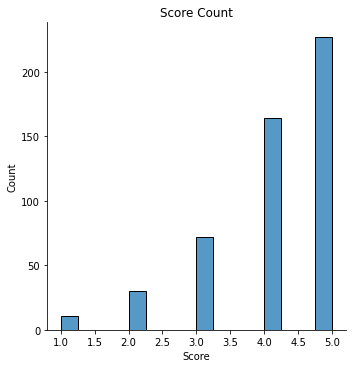

In [ ]:
#Distribution of Scores Bargraph
sns.displot(df, x='Score')
plt.title('Score Count')
plt.savefig("Score_Distribution.png")
plt.show

# Splitting the Data

In [3]:
#Splitting data
xtrain, xtest, ytrain, ytest = train_test_split(df[['Dummy Pool', 'Dummy Free Internet', 'Saturday', 'China', 'Business','Excalibur Hotel & Casino']], df['Score'],train_size=0.8, random_state=4)

# Initialize our decision tree object
classification_tree = DecisionTreeClassifier()

# Train our decision tree (tree induction + pruning)
classification_tree = classification_tree.fit(xtrain, ytrain)

# Decision Tree

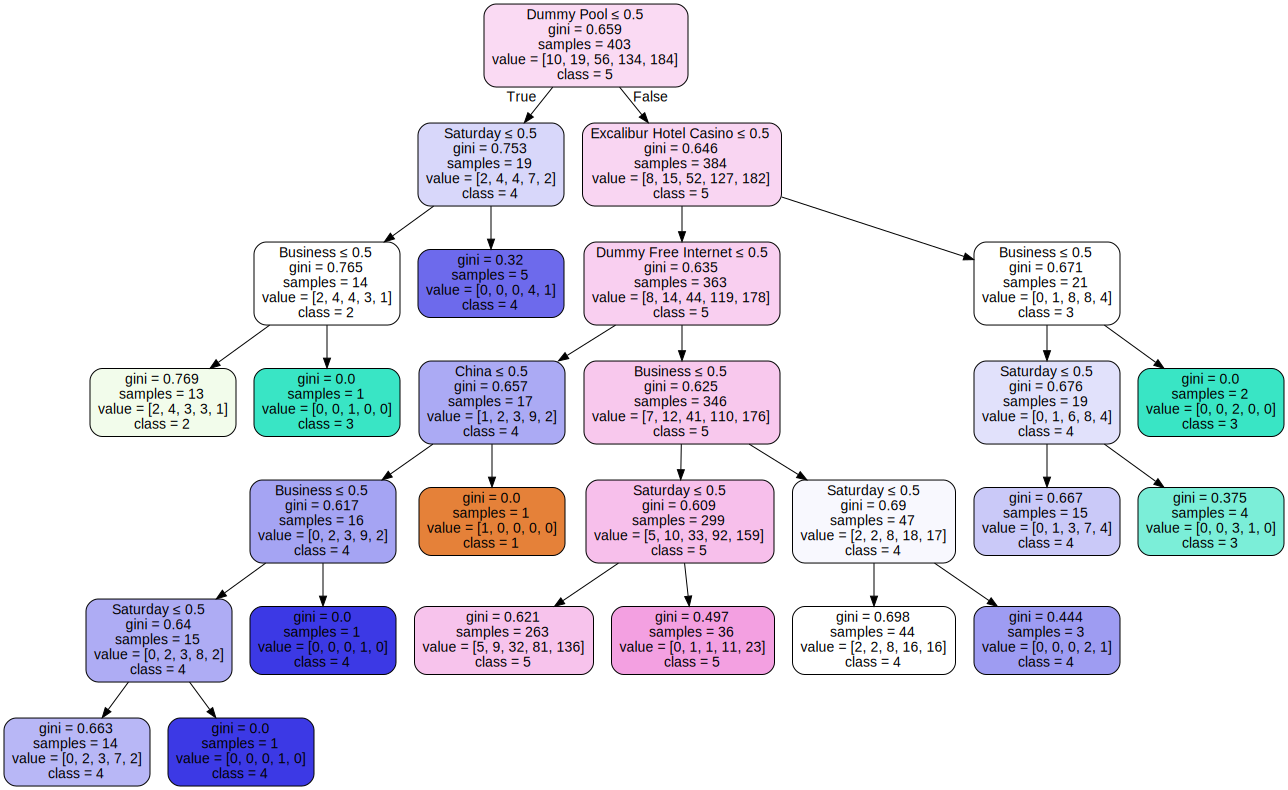

In [4]:
#Graphing decision tree
dot_data = export_graphviz(classification_tree, out_file=None,  
                           feature_names = ['Dummy Pool', 'Dummy Free Internet', 'Saturday', 'China', 'Business','Excalibur Hotel Casino'],  
                           class_names = ['1','2','3','4','5'], 
                           filled=True, rounded=True,  
                           special_characters=True)  
graph = graphviz.Source(dot_data)
graph


In [5]:
#Fitting and accessing tree
model = DecisionTreeClassifier(random_state=4)

model.fit(xtrain, ytrain)

y_pred = model.predict(xtest)

print(f'Accuracy Score: {metrics.accuracy_score(ytest, y_pred)}')
print(f'Precision Score: {metrics.precision_score(ytest, y_pred, average="macro")}')
print(f'Recall Score: {metrics.recall_score(ytest, y_pred, average="macro")}')
print(f'F1 Score: {metrics.f1_score(ytest, y_pred, average="macro")}')
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(ytest, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, y_pred)))
print('R^2: ', metrics.r2_score(ytest, y_pred))

Accuracy Score: 0.49504950495049505
Precision Score: 0.19711442786069652
Recall Score: 0.2587596899224806
F1 Score: 0.2212121212121212
Mean Absolute Error: 0.7920792079207921
Mean Squared Error: 1.5643564356435644
Root Mean Squared Error: 1.250742353821747
R^2:  -0.4112133003183589


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#CV accuracy score
DTCV_score = cross_val_score(model, xtrain, ytrain, cv=None)
print(np.mean(DTCV_score))

0.4887345679012346


In [ ]:
#CV f1 score
f1 = make_scorer(f1_score, average='weighted')
DTCVF1 = cross_val_score(model, xtrain, ytrain, cv=None, scoring=f1)
print(np.mean(DTCVF1))

0.41418695488276364


In [ ]:
#CV mean absolute error
MAE = make_scorer(mean_absolute_error, multioutput='uniform_average')
DTCV_score = cross_val_score(model, xtrain, ytrain, cv=None, scoring=MAE)
print(np.mean(DTCV_score))

0.729753086419753


In [ ]:
#Checking metrics
print(metrics.classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00        16
           4       0.43      0.43      0.43        30
           5       0.55      0.86      0.67        43

    accuracy                           0.50       101
   macro avg       0.20      0.26      0.22       101
weighted avg       0.36      0.50      0.42       101



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


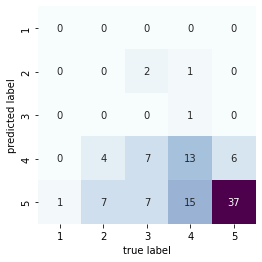

In [ ]:
#Confusion matrix
mat = confusion_matrix(ytest, y_pred)

#Making a heatmap of the confusion matrix
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=model.classes_, yticklabels=model.classes_, cmap=plt.cm.BuPu)
plt.xlabel('true label')
plt.ylabel('predicted label');

# Random Forest

In [ ]:
#Creating random forest
random_forest = RandomForestClassifier(max_features = 5, max_samples = 0.75, random_state=4)
random_forest.fit(xtrain, ytrain)

y_pred = random_forest.predict(xtest)

model_validation(ytest, y_pred)
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(ytest, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, y_pred)))
print('R^2: ', metrics.r2_score(ytest, y_pred))


random_forest.feature_names_in_

Accuracy Score: 0.46534653465346537
Precision Score: 0.17263339070567985
Recall Score: 0.22868217054263568
F1 Score: 0.17878787878787877
Mean Absolute Error: 0.8514851485148515
Mean Squared Error: 1.702970297029703
Root Mean Squared Error: 1.30497904083924
R^2:  -0.5362575168022641


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array(['Dummy Pool', 'Dummy Free Internet', 'Saturday', 'China',
       'Business', 'Excalibur Hotel & Casino'], dtype=object)

In [ ]:
#CV accuracy value
RFCV_score = cross_val_score(random_forest, xtrain, ytrain, cv=None)
print(np.mean(RFCV_score))

0.4912345679012346


In [ ]:
#CV f1 score
f1 = make_scorer(f1_score, average='weighted')
RFCVF1 = cross_val_score(random_forest, xtrain, ytrain, cv=None, scoring=f1)
print(np.mean(RFCVF1))

0.39995012382171014


In [ ]:
#CV mean absolute error
MAE = make_scorer(mean_absolute_error, multioutput='uniform_average')
DTCV_score = cross_val_score(random_forest, xtrain, ytrain, cv=None, scoring=MAE)
print(np.mean(DTCV_score))

0.7469444444444445


In [ ]:
#Checking metrics
print(metrics.classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00        16
           4       0.36      0.17      0.23        30
           5       0.51      0.98      0.67        43

    accuracy                           0.47       101
   macro avg       0.17      0.23      0.18       101
weighted avg       0.32      0.47      0.35       101



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


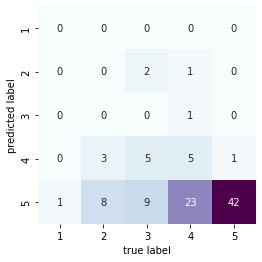

In [ ]:
#Confusion matrix
mat = confusion_matrix(ytest, y_pred)

#Making a heatmap of the confusion matrix
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=model.classes_, yticklabels=model.classes_, cmap=plt.cm.BuPu)
plt.xlabel('true label')
plt.ylabel('predicted label');

# Linear Regression

In [ ]:
regressor = LinearRegression()
regressor.fit(xtrain, ytrain);

y_pred = regressor.predict(xtest)

In [ ]:
df_test = pd.DataFrame({'Actual': ytest, 'Predicted': y_pred})
df_test

,Actual,Predicted
8,4,3.410026
397,4,4.265505
290,5,3.960000
453,5,4.585861
72,3,3.960000
...,...,...
374,4,4.265505
334,5,4.265505
486,4,3.960000
211,5,4.585861


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(ytest, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, y_pred)))
print('R^2: ', metrics.r2_score(ytest, y_pred))

Mean Absolute Error: 0.7860932079209166
Mean Squared Error: 0.9914328825185859
Root Mean Squared Error: 0.9957072273106116
R^2:  0.10562373235124733


In [ ]:
#CV mean absolute error
MAE = make_scorer(mean_absolute_error, multioutput='uniform_average')
DTCV_score = cross_val_score(regressor, xtrain, ytrain, cv=None, scoring=MAE)
print(np.mean(DTCV_score))

0.7587147084080139


# Oversampling

In [ ]:
#Oversampling data
sm = SMOTE(sampling_strategy='minority', random_state = 4)
X_train_res, y_train_res = sm.fit_resample(xtrain, ytrain)

Decision tree

In [ ]:
#Making decision tree
model = DecisionTreeClassifier(random_state=4)

model.fit(X_train_res, y_train_res)

y_pred = model.predict(xtest)

print(f'Accuracy Score: {metrics.accuracy_score(ytest, y_pred)}')
print(f'Precision Score: {metrics.precision_score(ytest, y_pred, average="macro")}')
print(f'Recall Score: {metrics.recall_score(ytest, y_pred, average="macro")}')
print(f'F1 Score: {metrics.f1_score(ytest, y_pred, average="macro")}')
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(ytest, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, y_pred)))
print('R^2: ', metrics.r2_score(ytest, y_pred))

Accuracy Score: 0.49504950495049505
Precision Score: 0.20330490405117274
Recall Score: 0.2587596899224806
F1 Score: 0.22420062695924764
Mean Absolute Error: 0.801980198019802
Mean Squared Error: 1.613861386138614
Root Mean Squared Error: 1.270378442094565
R^2:  -0.45587194906261064


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#CV accuracy value
DTOCV_score = cross_val_score(model, X_train_res, y_train_res, cv=None)
print(np.mean(DTOCV_score))

0.3968065967016492


In [ ]:
#CV f1 score
f1 = make_scorer(f1_score, average='weighted')
DTOF1 = cross_val_score(random_forest, xtrain, ytrain, cv=None, scoring=f1)
print(np.mean(DTOF1))

0.39995012382171014


In [ ]:
#CV mean absolute error
MAE = make_scorer(mean_absolute_error, multioutput='uniform_average')
DTCV_score = cross_val_score(model, X_train_res, y_train_res, cv=None, scoring=MAE)
print(np.mean(DTCV_score))

1.5167466266866567


In [ ]:
#Checking metrics
print(metrics.classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00        16
           4       0.46      0.43      0.45        30
           5       0.55      0.86      0.67        43

    accuracy                           0.50       101
   macro avg       0.20      0.26      0.22       101
weighted avg       0.37      0.50      0.42       101



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


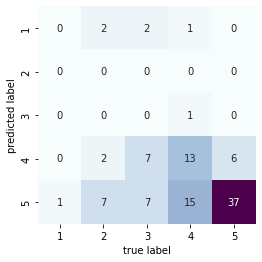

In [ ]:
#Confusion matrix
mat = confusion_matrix(ytest, y_pred)

#Making a heatmap of the confusion matrix
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=model.classes_, yticklabels=model.classes_, cmap=plt.cm.BuPu)
plt.xlabel('true label')
plt.ylabel('predicted label');

Random Forest

In [ ]:
#Creating random forest
random_forest = RandomForestClassifier(max_features = 5, max_samples = 0.75, random_state=4)
random_forest.fit(X_train_res, y_train_res)

y_pred = random_forest.predict(xtest)

model_validation(ytest, y_pred)
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(ytest, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, y_pred)))
print('R^2: ', metrics.r2_score(ytest, y_pred))

random_forest.feature_names_in_

Accuracy Score: 0.46534653465346537
Precision Score: 0.18453815261044176
Recall Score: 0.22868217054263568
F1 Score: 0.18095238095238092
Mean Absolute Error: 0.8613861386138614
Mean Squared Error: 1.7524752475247525
Root Mean Squared Error: 1.3238108805734876
R^2:  -0.5809161655465158


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array(['Dummy Pool', 'Dummy Free Internet', 'Saturday', 'China',
       'Business', 'Excalibur Hotel & Casino'], dtype=object)

In [ ]:
#CV accuracy value
RFCV_score = cross_val_score(random_forest, X_train_res, y_train_res, cv=None)
print(np.mean(RFCV_score))

0.4037481259370314


In [ ]:
#CV f1 score
f1 = make_scorer(f1_score, average='weighted')
RFOF1 = cross_val_score(random_forest, X_train_res, y_train_res, cv=None, scoring=f1)
print(np.mean(RFOF1))

0.33544100148744443


In [ ]:
#CV mean absolute error
MAE = make_scorer(mean_absolute_error, multioutput='uniform_average')
DTCV_score = cross_val_score(random_forest, X_train_res, y_train_res, cv=None, scoring=MAE)
print(np.mean(DTCV_score))

1.4715892053973012


In [ ]:
#Checking metrics
print(metrics.classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00        16
           4       0.42      0.17      0.24        30
           5       0.51      0.98      0.67        43

    accuracy                           0.47       101
   macro avg       0.18      0.23      0.18       101
weighted avg       0.34      0.47      0.35       101



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


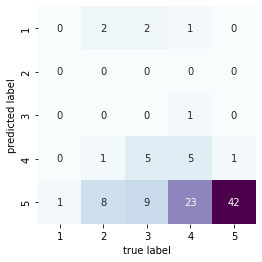

In [ ]:
#Confusion matrix
mat = confusion_matrix(ytest, y_pred)

#Making a heatmap of the confusion matrix
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=model.classes_, yticklabels=model.classes_, cmap=plt.cm.BuPu)
plt.xlabel('true label')
plt.ylabel('predicted label');

Linear Regression

In [ ]:
#Creating Linear model
regressor = LinearRegression()
regressor.fit(X_train_res, y_train_res);

y_pred = regressor.predict(xtest)

In [ ]:
df_test = pd.DataFrame({'Actual': ytest, 'Predicted': y_pred})
df_test

,Actual,Predicted
8,4,3.018212
397,4,3.270273
290,5,3.186622
453,5,4.550567
72,3,3.186622
...,...,...
374,4,3.270273
334,5,3.270273
486,4,3.186622
211,5,4.550567


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(ytest, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, y_pred)))
print('R^2: ', metrics.r2_score(ytest, y_pred))

Mean Absolute Error: 1.121260367217066
Mean Squared Error: 1.6097464636457992
Root Mean Squared Error: 1.2687578427918385
R^2:  -0.4521598581226389


In [ ]:
#CV mean absolute error
MAE = make_scorer(mean_absolute_error, multioutput='uniform_average')
DTCV_score = cross_val_score(regressor, X_train_res, y_train_res, cv=None, scoring=MAE)
print(np.mean(DTCV_score))

1.5928595359009114


# Weighting

In [ ]:
#Weighting the data
classes = np.unique(ytrain)
cw = class_weight.compute_class_weight('balanced', classes=classes, y=ytrain)
weights = dict(zip(classes, cw))
print(weights)

{1: 8.06, 2: 4.242105263157895, 3: 1.4392857142857143, 4: 0.6014925373134329, 5: 0.4380434782608696}


Decision Tree

In [ ]:
#Making decision tree
model = DecisionTreeClassifier(class_weight=weights, random_state=4)

model.fit(xtrain, ytrain)

y_pred = model.predict(xtest)

model_validation(ytest, y_pred)
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(ytest, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, y_pred)))
print('R^2: ', metrics.r2_score(ytest, y_pred))

Accuracy Score: 0.4158415841584158
Precision Score: 0.2806858564321251
Recall Score: 0.22277484143763213
F1 Score: 0.2093992557150452
Mean Absolute Error: 1.188118811881188
Mean Squared Error: 3.0495049504950495
Root Mean Squared Error: 1.746283181644675
R^2:  -1.7509727626459148


In [ ]:
#CV accuracy value
DTWCV_score = cross_val_score(model, xtrain, ytrain, cv=None)
print(np.mean(DTWCV_score))

0.43666666666666665


In [ ]:
#CV f1 score
f1 = make_scorer(f1_score, average='weighted')
DTWF1 = cross_val_score(model, xtrain, ytrain, cv=None, scoring=f1)
print(np.mean(DTWF1))

0.35494377512293845


In [ ]:
#CV mean absolute error
MAE = make_scorer(mean_absolute_error, multioutput='uniform_average')
DTWCV_score = cross_val_score(model, xtrain, ytrain, cv=None, scoring=MAE)
print(np.mean(DTWCV_score))

0.9331481481481481


In [ ]:
#Checking metrics
print(metrics.classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.14      0.09      0.11        11
           3       0.33      0.06      0.11        16
           4       0.38      0.10      0.16        30
           5       0.55      0.86      0.67        43

    accuracy                           0.42       101
   macro avg       0.28      0.22      0.21       101
weighted avg       0.41      0.42      0.36       101



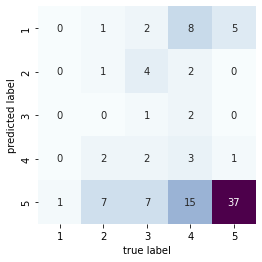

In [ ]:
#Confusion matrix
mat = confusion_matrix(ytest, y_pred)

#Making a heatmap of the confusion matrix
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=model.classes_, yticklabels=model.classes_, cmap=plt.cm.BuPu)
plt.xlabel('true label')
plt.ylabel('predicted label');

Random Forest

In [ ]:
#Creating random forest
random_forest = RandomForestClassifier(max_features = 5, max_samples = 0.75, random_state=4, class_weight=weights)
random_forest.fit(xtrain, ytrain)

y_pred = random_forest.predict(xtest)

model_validation(ytest, y_pred)
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(ytest, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, y_pred)))
print('R^2: ', metrics.r2_score(ytest, y_pred))

random_forest.feature_names_in_

Accuracy Score: 0.4158415841584158
Precision Score: 0.21901918976545845
Recall Score: 0.21694150810429882
F1 Score: 0.19676767676767676
Mean Absolute Error: 1.188118811881188
Mean Squared Error: 3.0495049504950495
Root Mean Squared Error: 1.746283181644675
R^2:  -1.7509727626459148


array(['Dummy Pool', 'Dummy Free Internet', 'Saturday', 'China',
       'Business', 'Excalibur Hotel & Casino'], dtype=object)

In [ ]:
#CV accuracy value
RFWCV_score = cross_val_score(random_forest, xtrain, ytrain, cv=None)
print(np.mean(RFWCV_score))

0.4466049382716049


In [ ]:
#CV f1 score
f1 = make_scorer(f1_score, average='weighted')
RFWF1 = cross_val_score(random_forest, xtrain, ytrain, cv=None, scoring=f1)
print(np.mean(RFWF1))

0.3725285491990138


In [ ]:
#CV mean absolute error
MAE = make_scorer(mean_absolute_error, multioutput='uniform_average')
RFWCV_score = cross_val_score(random_forest, xtrain, ytrain, cv=None, scoring=MAE)
print(np.mean(RFWCV_score))

0.8934259259259258


In [ ]:
#Checking metrics
print(metrics.classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.14      0.09      0.11        11
           3       0.00      0.00      0.00        16
           4       0.40      0.13      0.20        30
           5       0.55      0.86      0.67        43

    accuracy                           0.42       101
   macro avg       0.22      0.22      0.20       101
weighted avg       0.37      0.42      0.36       101



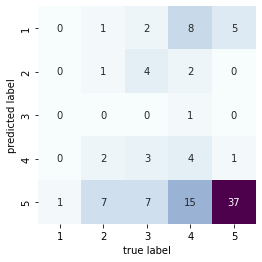

In [ ]:
#Confusion matrix
mat = confusion_matrix(ytest, y_pred)

#Making a heatmap of the confusion matrix
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=model.classes_, yticklabels=model.classes_, cmap=plt.cm.BuPu)
plt.xlabel('true label')
plt.ylabel('predicted label');

Linear Regression

In [ ]:
#Making linear regression
regressor = LinearRegression()
regressor.fit(xtrain, ytrain);

y_pred = regressor.predict(xtest)

print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(ytest, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, y_pred)))
print('R^2: ', metrics.r2_score(ytest, y_pred))

In [ ]:
#CV absolute mean error
MAE = make_scorer(mean_absolute_error, multioutput='uniform_average')
LMOCV_score = cross_val_score(regressor, X_train_res, y_train_res, cv=None, scoring=MAE)
print(np.mean(LMOCV_score))